In [1]:
import face_recognition
import os
import cv2
from matplotlib import pyplot as plt

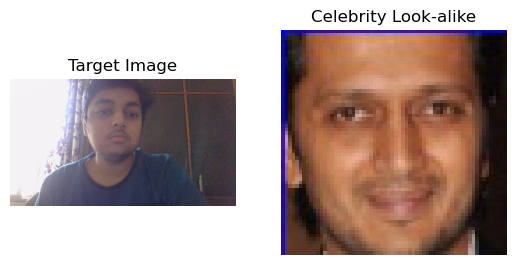

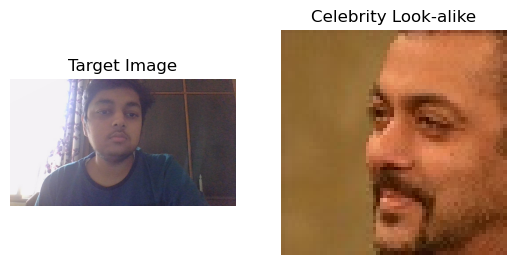

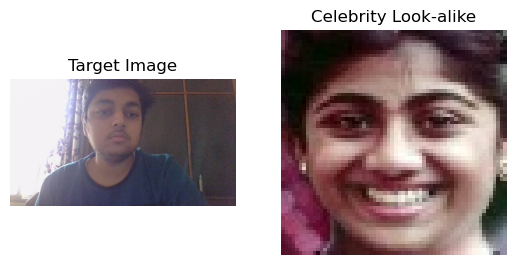

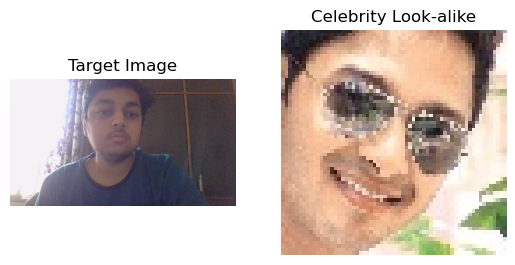

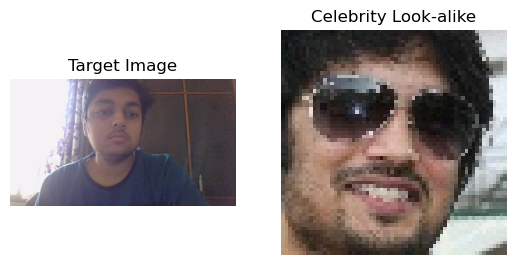

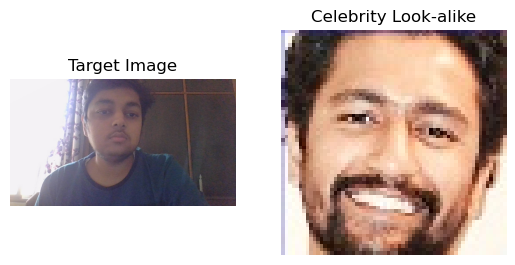

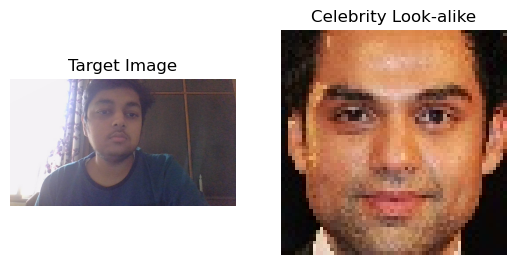

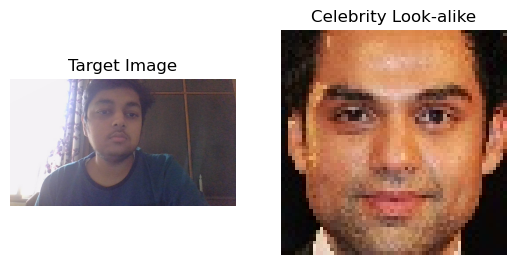

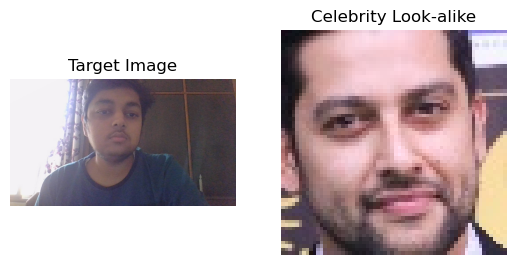

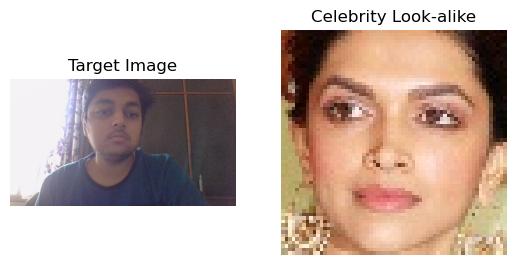

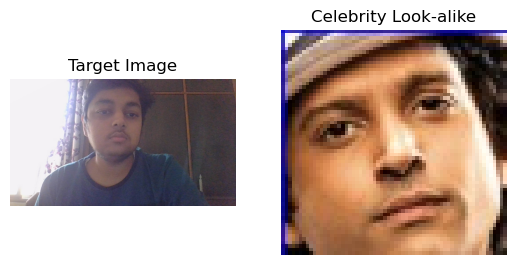

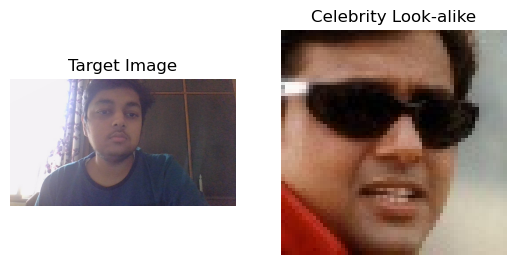

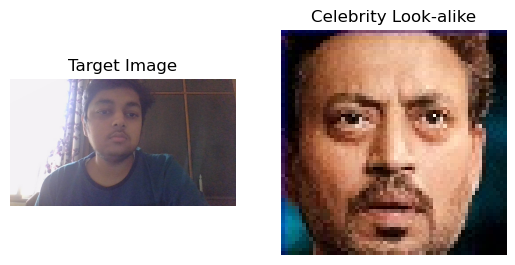

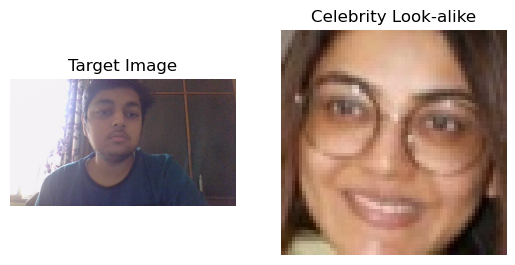

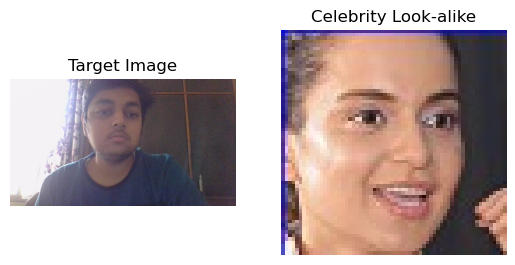

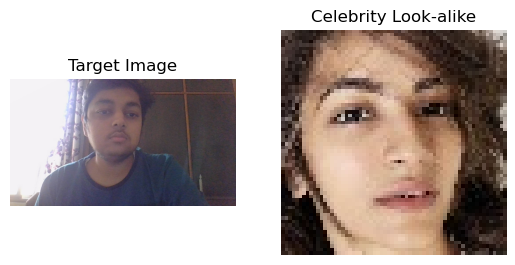

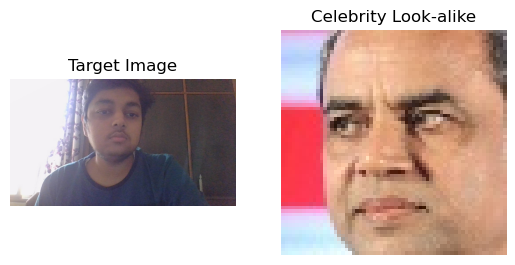

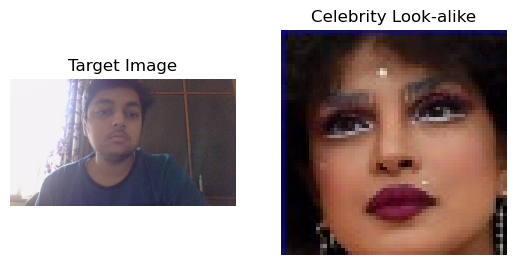

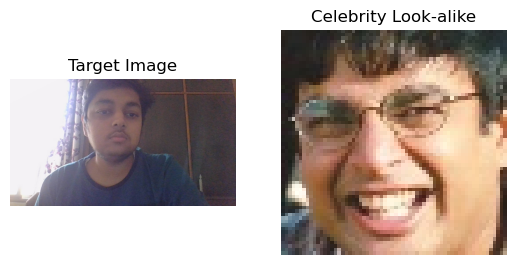

.


In [2]:
def find_celebrity_look_alike(image_path, celebrities_folder):
    # Loading the target image
    target_image = face_recognition.load_image_file(image_path)
    target_encoding = face_recognition.face_encodings(target_image)[0]

    # Recursive function to search for images in nested folders
    def search_images_in_folder(folder_path):
        for item in os.listdir(folder_path):
            item_path = os.path.join(folder_path, item)

            if os.path.isdir(item_path):
                # If it's a directory, recursively searching images
                search_images_in_folder(item_path)
            elif item.lower().endswith(('.jpg', '.jpeg', '.png', '.gif', '.bmp')):
                # If it's an image file, load and compare encodings
                celebrity_image = face_recognition.load_image_file(item_path)
                celebrity_encoding = face_recognition.face_encodings(celebrity_image)

                if len(celebrity_encoding) > 0:
                    celebrity_encoding = celebrity_encoding[0]

                    # Comparing the encodings
                    results = face_recognition.compare_faces([target_encoding], celebrity_encoding)

                    if results[0]:
                        # Displaying the target and celebrity images
                        target_img = cv2.imread(image_path)
                        celebrity_img = cv2.imread(item_path)

                        plt.subplot(1, 2, 1)
                        plt.imshow(cv2.cvtColor(target_img, cv2.COLOR_BGR2RGB))
                        plt.title("Target Image")
                        plt.axis('off')

                        plt.subplot(1, 2, 2)
                        plt.imshow(cv2.cvtColor(celebrity_img, cv2.COLOR_BGR2RGB))
                        plt.title("Celebrity Look-alike")
                        plt.axis('off')

                        plt.show()

                        return f"Found a look-alike in {os.path.dirname(item_path)} folder."

    # Starting the search from the celebrities_folder
    result = search_images_in_folder(celebrities_folder)

    if result is None:
        return "."

    return result


image_path = r"C:\Users\Jeevesh Narayan\Pictures\Camera Roll\WIN_20231221_14_18_53_Pro.jpg"
celebrities_folder = r"C:\Users\Jeevesh Narayan\jeevesh_bcs1\Bollywood_celeb_face_localized"

result = find_celebrity_look_alike(image_path, celebrities_folder)
print(result)